# [Lecture 8] Classification

## 1. Classification problems:

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Simulate 2-classes, 2-features classification data randomly.


In [50]:
from sklearn import datasets
from pandas import Series, DataFrame
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
                          n_informative = 1, n_redundant = 0, n_repeated = 0,
                          n_clusters_per_class = 1)
Data = DataFrame(X)
Data['class'] = y
Data.describe()

,0,1,class
count,200.000000,200.000000,200.00000
mean,-0.061123,-0.024848,0.49500
std,1.166434,0.963705,0.50123
min,-2.939508,-2.682301,0.00000
25%,-1.053891,-0.712317,0.00000
50%,0.113459,0.033769,0.00000
75%,0.893110,0.619851,1.00000
max,2.416742,2.860640,1.00000


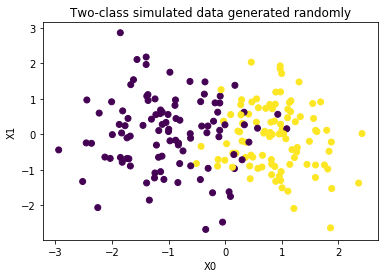

In [51]:
plt.scatter(X[:,0],X[:,1],marker = 'o',c = y)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Two-class simulated data generated randomly")
plt.show()

### Multi-class classification examples: iris dataset

In [171]:
iris = datasets.load_iris()
X = iris['data']
y = iris.target

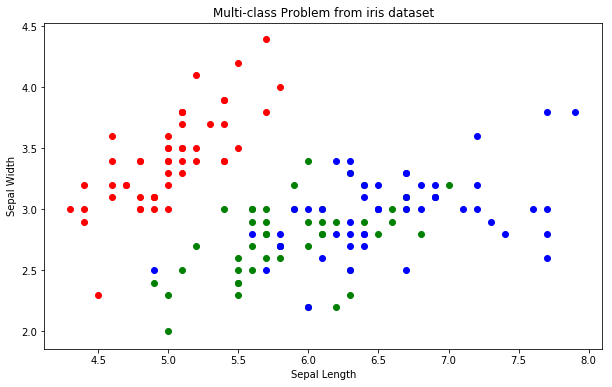

In [172]:
cols = ['red','green','blue']
fig, dummy = plt.subplots()
fig.set_size_inches(10,6)
for idx,label in enumerate(iris['target_names']):
    d = plt.scatter(x = X[iris['target']==idx,0],
                y = X[iris['target']==idx,1],
                marker = 'o',
                c = cols[idx])
d = plt.xlabel("Sepal Length")
d = plt.ylabel("Sepal Width")
d = plt.title("Multi-class Problem from iris dataset")
d = plt.show()

### Or simply:

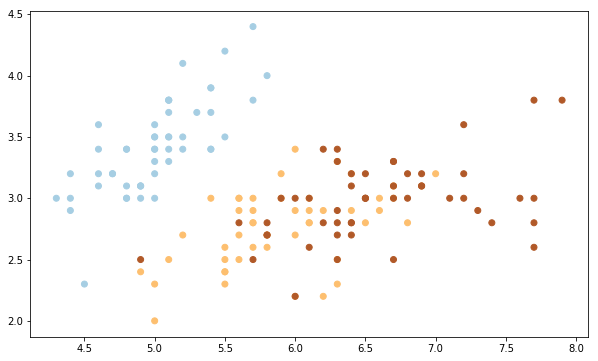

In [173]:
fig,dummy = plt.subplots()
fig.set_size_inches(10,6)
d = plt.scatter(x = X[:,0],y = X[:,1],c = iris.target, cmap = plt.cm.Paired)
plt.show()

## 2. Logistic regression:

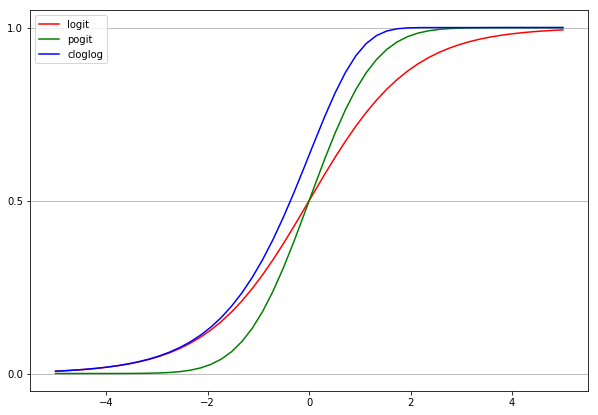

In [164]:
from numpy import linspace
from scipy.stats import norm
def logit(x):
    return 1/(1+np.exp(-x))

def pogit(x):
    return norm.cdf(x)

def cloglog(x):
    return 1-np.exp(-np.exp(x))

#Draw the three logistic function:
x = linspace(-5,5,50)
fig = plt.gcf()
fig.set_size_inches(10, 7)
dummy = plt.plot(x,logit(x),c = 'red', label = 'logit')
dummy = plt.plot(x,pogit(x),c = 'green', label = 'pogit')
dummy = plt.plot(x,cloglog(x),c = 'blue', label = 'cloglog')
dummy = plt.legend(loc = 'best')
dummy = plt.yticks([0,0.5,1])

ax = plt.gca()
dummy = ax.yaxis.grid(True)
plt.show()


### In python, sklearn.logisticRegression function can easily fit the binomial model using the logit function

In [189]:
from sklearn.linear_model import LogisticRegression
X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
                          n_informative = 1, n_redundant = 0, n_repeated = 0,
                          n_clusters_per_class = 1)

fit_lgs = LogisticRegression()
fit_lgs.fit(X,y)
print("This is the fitted parameters for logistic regression: ",fit_lgs.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

This is the fitted parameters for logistic regression:  [[-0.21610058  3.24729521]]


# To be continued...